# Project Proposal - Employee Salaries in 2016 of Montgomery County,MD
The dataset which I chose is regarding the Annual salary information along with the gross pay and the overtime pay of all the active, permanent employees of Montgomery County, MD in the year 2016.The Data Source for this dataset is : https://catalog.data.gov/dataset/employee-salaries-2016. I discovered this data source while browsing a site called data.gov where I typed ‘salaries’ in the search tab as I wanted data related to employees and their salary patterns. This data is an opensource and available for free to download. It is completely legal to access this data and using this data does not violate the terms of service. I checked online if anyone has previously performed an EDA on this data set or any kind of analysis on this data and did not find any citations nor any research papers related to this data set. This data set has 9228 rows and 12 columns(of different types like date, float ,strings etc.) and the size of this dataset is 1.42 MB. This data set has 9228 rows where each row represents the salary information of each employee and columns are Full name, Gender, Current Annual Salary(annual salary of the employee at the end of the calendar year 2016), Grass Pay received in 2016( entire earnings pre-tax deductions),Over time pay(pay for the hours for working beyond his schedule),Department code, Department name, Division in department to which the employee is assigned, Assignment Category(Fulltime/Part-time), Employee position title, Underfilled job title (the employee is currently holding lower rank job title but is currently filling a higher level position),Date first hired (when was the employee first hired). This data set has many missing values for the columns gross pay and overtime pay and an unwanted column, so we have to do some cleaning process. We can make visualizations for salaries of each department and each division and gender specific visualizations. We can use this data for understanding the annual pay for a particular position in a particular department, we can even get the average of salaries of all the employees in a particular department , compare wages by occupations, assist students in choosing a career decisions and find the different occupational profiles available etc

# Primary Observation
    The number of Male and female in each department
    The number of full time or part time workers in each department
    which department has the most number of employees
    which department has the highest avg Current Annual salary, Gross Pay and Overtime Pay
    which department has the least avg Current Annual salary, Gross Pay and Overtime Pay
    which divison has the highest avg Current Annual salary, Gross Pay and Overtime Pay
    which division has the least avg Current Annual salary, Gross Pay and Overtime Pay
    which employee position has the highest avg Current Annual salary, Gross Pay and Overtime Pay
    which employee position has the least avg Current Annual salary, Gross Pay and Overtime Pay
    what are the different departments available , divisions in each department and employee positions in each division
This data may be used to choose a career path which has the highest annual salary and which department has the highest overtime pay. What are the different job profiles available in each department and which position has the highest pay etc.
 

Import Pandas and Numpy
Import time for displaying the overall program execution time and matplotlib.pyplot for plotting data


In [1]:
import time
start_time = time.time()
import pandas as pd
print('Pandas',pd.__version__)
import numpy as np
import matplotlib.pyplot as plt


Pandas 0.24.2


Figuring out the encoding of file using chardet

In [2]:
import chardet
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

Reading the contents of the file

In [3]:
with open('Employee_Salaries_-_2016.csv','rb') as fraw:
    file_content = fraw.read()

In [4]:
chardet.detect(file_content)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

Loading the data from a csv file to a data frame

In [5]:
emp_data= pd.read_csv('Employee_Salaries_-_2016.csv')
emp_data.shape


(9228, 12)

Displaying the top 5 rows of the data

In [6]:
emp_data.head()

Full Name Gender  Current Annual Salary  2016 Gross Pay Received  \
0      Aarhus, Pam J.      F               69222.18                 71225.98   
1     Aaron, David J.      M               97392.47                103088.48   
2    Aaron, Marsha M.      F              104717.28                107000.24   
3  Ababio, Godfred A.      M               52734.57                 57819.04   
4      Ababu, Essayas      M               93396.00                 95815.17   

   2016 Overtime Pay Department                              Department Name  \
0             416.10        POL                         Department of Police   
1            3326.19        POL                         Department of Police   
2            1353.32        HHS      Department of Health and Human Services   
3            3423.07        COR                Correction and Rehabilitation   
4                NaN        HCA  Department of Housing and Community Affairs   

                                            Division Assignment Category  \
0  MSB Information Mgmt and Tech Division Records...    Fulltime-Regular   
1         ISB Major Crimes Division Fugitive Section    Fulltime-Regular   
2      Adult Protective and Case Management Services    Fulltime-Regular   
3                         PRRS Facility and Security    Fulltime-Regular   
4                        Affordable Housing Programs    Fulltime-Regular   

       Employee Position Title Underfilled Job Title Date First Hired  
0  Office Services Coordinator                   NaN       09/22/1986  
1        Master Police Officer                   NaN       09/12/1988  
2             Social Worker IV                   NaN       11/19/1989  
3       Resident Supervisor II                   NaN       05/05/2014  
4      Planning Specialist III                   NaN       03/05/2007

Displaying the data types of each column in the data frame

In [7]:
emp_data.dtypes

Full Name                   object
Gender                      object
Current Annual Salary      float64
2016 Gross Pay Received    float64
2016 Overtime Pay          float64
Department                  object
Department Name             object
Division                    object
Assignment Category         object
Employee Position Title     object
Underfilled Job Title       object
Date First Hired            object
dtype: object

Describing the data 


In [8]:
emp_data.describe()

Current Annual Salary  2016 Gross Pay Received  2016 Overtime Pay
count            9228.000000              9128.000000        6311.000000
mean            73390.178435             79504.036708       10334.301512
std             29119.118284             35105.237959       12678.495029
min              9196.000000                 0.000000       -2222.850000
25%             52592.927500             56690.702500        1726.540000
50%             69390.000000             76866.550000        6184.450000
75%             91969.070000            100170.335000       14309.685000
max            303091.000000            313700.420000      125244.350000

We can observe that the column 2016 Overtime Pay has a minimum value as negative but a payment can be either 0 or +ve but not negative so converting it to positive

In [9]:
a=emp_data[emp_data['2016 Overtime Pay']<0].index[0]
emp_data.loc[a,'2016 Overtime Pay']=emp_data.iloc[a]['2016 Overtime Pay']* -1

emp_data.loc[a,'2016 Overtime Pay']

2222.85

If we dont set include to 'all' by ddefault it describes only numeric columns

In [10]:
emp_data.describe(include= 'all')

Full Name Gender  Current Annual Salary  2016 Gross Pay Received  \
count           9228   9211            9228.000000              9128.000000   
unique          9222      2                    NaN                      NaN   
top     Cruz, Angela      M                    NaN                      NaN   
freq               2   5481                    NaN                      NaN   
mean             NaN    NaN           73390.178435             79504.036708   
std              NaN    NaN           29119.118284             35105.237959   
min              NaN    NaN            9196.000000                 0.000000   
25%              NaN    NaN           52592.927500             56690.702500   
50%              NaN    NaN           69390.000000             76866.550000   
75%              NaN    NaN           91969.070000            100170.335000   
max              NaN    NaN          303091.000000            313700.420000   

        2016 Overtime Pay Department       Department Name  \
count         6311.000000       9228                  9228   
unique                NaN         37                    37   
top                   NaN        POL  Department of Police   
freq                  NaN       1844                  1844   
mean         10335.005948        NaN                   NaN   
std          12677.920716        NaN                   NaN   
min              0.000000        NaN                   NaN   
25%           1727.875000        NaN                   NaN   
50%           6184.450000        NaN                   NaN   
75%          14309.685000        NaN                   NaN   
max         125244.350000        NaN                   NaN   

                      Division Assignment Category Employee Position Title  \
count                     9228                9228                    9228   
unique                     694                   2                     385   
top     School Health Services    Fulltime-Regular      Police Officer III   
freq                       300                8394                     883   
mean                       NaN                 NaN                     NaN   
std                        NaN                 NaN                     NaN   
min                        NaN                 NaN                     NaN   
25%                        NaN                 NaN                     NaN   
50%                        NaN                 NaN                     NaN   
75%                        NaN                 NaN                     NaN   
max                        NaN                 NaN                     NaN   

         Underfilled Job Title Date First Hired  
count                     1093             9228  
unique                      84             2264  
top     Firefighter/Rescuer II       12/12/2016  
freq                       219               87  
mean                       NaN              NaN  
std                        NaN              NaN  
min                        NaN              NaN  
25%                        NaN              NaN  
50%                        NaN              NaN  
75%                        NaN              NaN  
max                        NaN              NaN

The number of Unique values in Gender column

In [11]:
emp_data['Gender'].nunique()

2

How many times each unique value has repeated 

In [12]:
emp_data['Gender'].value_counts()

M    5481
F    3730
Name: Gender, dtype: int64

In [13]:
emp_data.dtypes

Full Name                   object
Gender                      object
Current Annual Salary      float64
2016 Gross Pay Received    float64
2016 Overtime Pay          float64
Department                  object
Department Name             object
Division                    object
Assignment Category         object
Employee Position Title     object
Underfilled Job Title       object
Date First Hired            object
dtype: object

By observing the data types of each column we see that datatype of gender was given as object so we need to convert it to category 

In [14]:
emp_data['Gender']=emp_data['Gender'].astype('category')

In [15]:
emp_data.dtypes


Full Name                    object
Gender                     category
Current Annual Salary       float64
2016 Gross Pay Received     float64
2016 Overtime Pay           float64
Department                   object
Department Name              object
Division                     object
Assignment Category          object
Employee Position Title      object
Underfilled Job Title        object
Date First Hired             object
dtype: object

Number of unique values in Department and Department name

In [16]:
emp_data['Department'].nunique()

37

In [17]:
emp_data['Department Name'].nunique()

37

In [18]:
emp_data.head()

Full Name Gender  Current Annual Salary  2016 Gross Pay Received  \
0      Aarhus, Pam J.      F               69222.18                 71225.98   
1     Aaron, David J.      M               97392.47                103088.48   
2    Aaron, Marsha M.      F              104717.28                107000.24   
3  Ababio, Godfred A.      M               52734.57                 57819.04   
4      Ababu, Essayas      M               93396.00                 95815.17   

   2016 Overtime Pay Department                              Department Name  \
0             416.10        POL                         Department of Police   
1            3326.19        POL                         Department of Police   
2            1353.32        HHS      Department of Health and Human Services   
3            3423.07        COR                Correction and Rehabilitation   
4                NaN        HCA  Department of Housing and Community Affairs   

                                            Division Assignment Category  \
0  MSB Information Mgmt and Tech Division Records...    Fulltime-Regular   
1         ISB Major Crimes Division Fugitive Section    Fulltime-Regular   
2      Adult Protective and Case Management Services    Fulltime-Regular   
3                         PRRS Facility and Security    Fulltime-Regular   
4                        Affordable Housing Programs    Fulltime-Regular   

       Employee Position Title Underfilled Job Title Date First Hired  
0  Office Services Coordinator                   NaN       09/22/1986  
1        Master Police Officer                   NaN       09/12/1988  
2             Social Worker IV                   NaN       11/19/1989  
3       Resident Supervisor II                   NaN       05/05/2014  
4      Planning Specialist III                   NaN       03/05/2007

The number of unique values in Assignment Category

In [19]:
emp_data['Assignment Category'].nunique()

2

count of each unique value in that column

In [20]:
emp_data['Assignment Category'].value_counts()

Fulltime-Regular    8394
Parttime-Regular     834
Name: Assignment Category, dtype: int64

In [21]:
emp_data.dtypes

Full Name                    object
Gender                     category
Current Annual Salary       float64
2016 Gross Pay Received     float64
2016 Overtime Pay           float64
Department                   object
Department Name              object
Division                     object
Assignment Category          object
Employee Position Title      object
Underfilled Job Title        object
Date First Hired             object
dtype: object

we can see that we can convert the data type of Assignment Category to category from object

In [22]:
emp_data['Assignment Category']=emp_data['Assignment Category'].astype('category')

In [23]:
emp_data.dtypes

Full Name                    object
Gender                     category
Current Annual Salary       float64
2016 Gross Pay Received     float64
2016 Overtime Pay           float64
Department                   object
Department Name              object
Division                     object
Assignment Category        category
Employee Position Title      object
Underfilled Job Title        object
Date First Hired             object
dtype: object

Displaying the last five rows

In [24]:
emp_data.tail()

Full Name Gender  Current Annual Salary  \
9223     Zurita, Justina      F               72094.53   
9224    Zuspan, Diane M.      F              169543.85   
9225    Zwerdling, David      M              102736.52   
9226  Zyontz, Jeffrey L.      M              153747.50   
9227    Zywiolek, Tim R.      M               75484.08   

      2016 Gross Pay Received  2016 Overtime Pay Department  \
9223                 58154.47                NaN        HHS   
9224                173173.01             956.97        FRS   
9225                104238.18                NaN        HHS   
9226                149105.25                NaN        CCL   
9227                 74975.53                NaN        DLC   

                              Department Name  \
9223  Department of Health and Human Services   
9224                 Fire and Rescue Services   
9225  Department of Health and Human Services   
9226                           County Council   
9227             Department of Liquor Control   

                                               Division Assignment Category  \
9223                        School Based Health Centers    Fulltime-Regular   
9224                           Human Resources Division    Fulltime-Regular   
9225  Child and Adolescent Mental Health Clinic Serv...    Parttime-Regular   
9226                              Council Central Staff    Fulltime-Regular   
9227                Licensure, Regulation and Education    Fulltime-Regular   

                        Employee Position Title Underfilled Job Title  \
9223                  Community Health Nurse II                   NaN   
9224                 Fire/Rescue Division Chief                   NaN   
9225           Medical Doctor IV - Psychiatrist                   NaN   
9226                                 Manager II                   NaN   
9227  Alcohol/Tobacco Enforcement Specialist II                   NaN   

     Date First Hired  
9223       11/03/2015  
9224       11/28/1988  
9225       04/30/2001  
9226       09/05/2006  
9227       01/30/2012

Displaying the number of null values in each column

In [25]:
emp_data.isnull().sum()

Full Name                     0
Gender                       17
Current Annual Salary         0
2016 Gross Pay Received     100
2016 Overtime Pay          2917
Department                    0
Department Name               0
Division                      0
Assignment Category           0
Employee Position Title       0
Underfilled Job Title      8135
Date First Hired              0
dtype: int64

ratio on null values in each column to the length of the data set

In [26]:
emp_data.isnull().sum()/len(emp_data)

Full Name                  0.000000
Gender                     0.001842
Current Annual Salary      0.000000
2016 Gross Pay Received    0.010837
2016 Overtime Pay          0.316103
Department                 0.000000
Department Name            0.000000
Division                   0.000000
Assignment Category        0.000000
Employee Position Title    0.000000
Underfilled Job Title      0.881556
Date First Hired           0.000000
dtype: float64

Checking if any column has all same values

In [27]:
for this_column in emp_data.columns:
    if (emp_data[this_column].nunique()==1):
        print(this_column)

Install missingno to display a plot of null values in the data

In [28]:
!pip install missingno

In [29]:
import missingno as msno

Displaying the sparseness of data taking a sample of 2500 rows

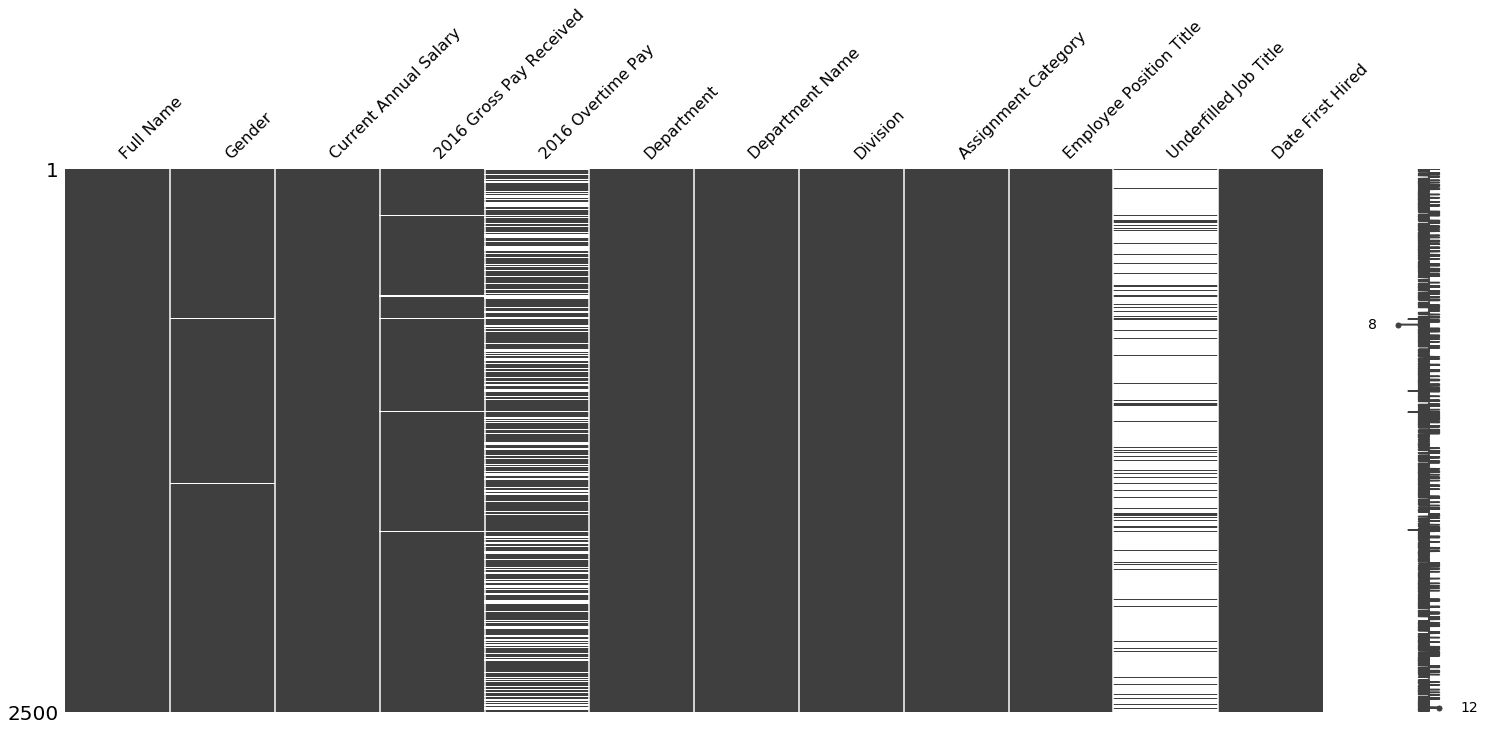

In [30]:
_=msno.matrix(emp_data.sample(2500))

Black = filled; white = empty

Since we can observe that Underfilled Job Title has a lot of missing values and we are not going to use it in our analysis we can drop that column

In [31]:
emp_data.drop('Underfilled Job Title',axis=1,inplace=True)

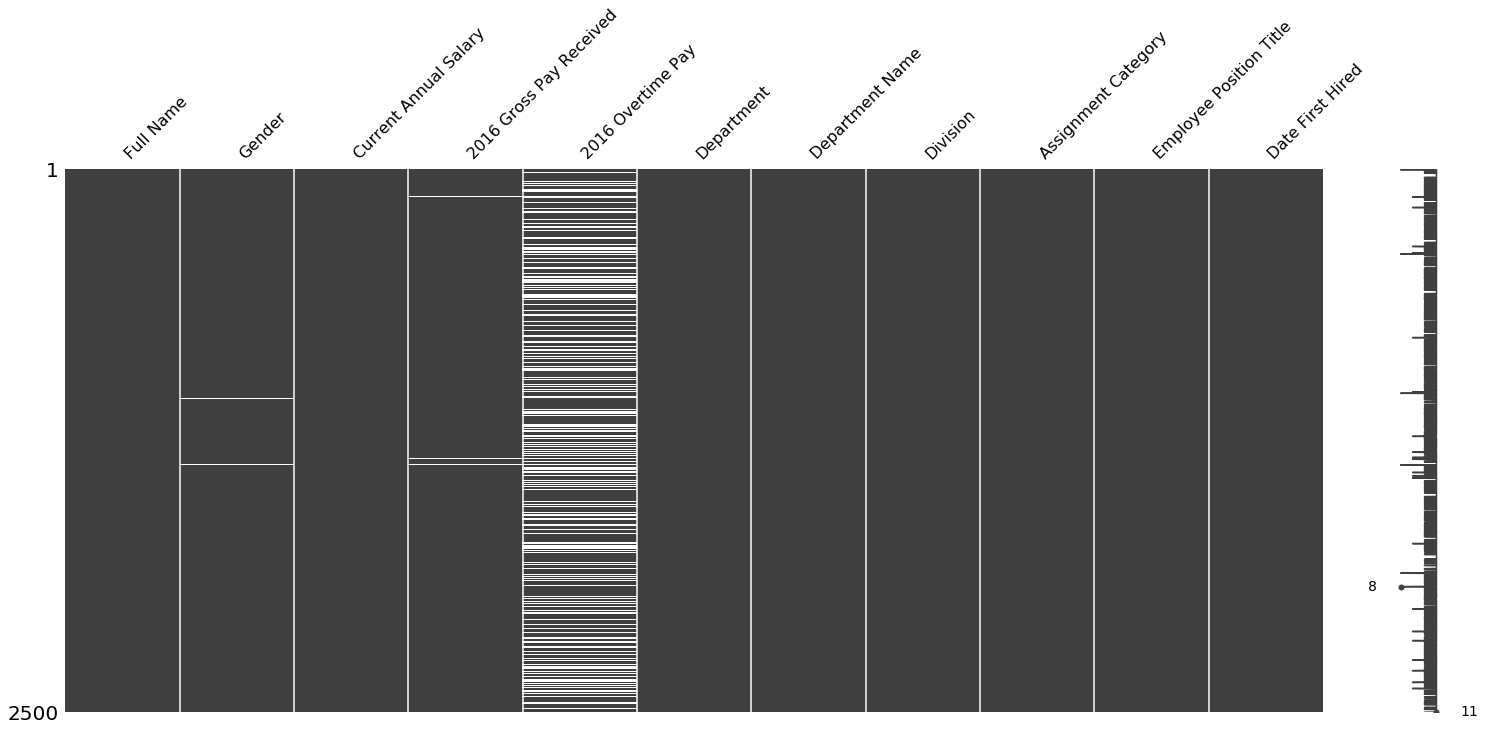

In [32]:
_=msno.matrix(emp_data.sample(2500))

In [33]:
emp_data

Full Name Gender  Current Annual Salary  \
0                             Aarhus, Pam J.      F               69222.18   
1                            Aaron, David J.      M               97392.47   
2                           Aaron, Marsha M.      F              104717.28   
3                         Ababio, Godfred A.      M               52734.57   
4                             Ababu, Essayas      M               93396.00   
5                         Abbamonte, Drew B.      M               70435.00   
6                          Abdalla, Eiman M.      F               60300.00   
7                     Abdelmoniem, Marwan M.      M               64788.65   
8                          Abdool, Daniel Z.      M               45261.00   
9                    Abdul-Ghani, Hasinah J.      F               47670.09   
10                         Abduljabar, Saeed      M               63492.87   
11                  Abdur-Raheem, Mikaeel A.      M               58671.02   
12                             Abebe, Hiruth      F              152343.20   
13                        Abebe, Zekarias S.      M               46626.87   
14                          Abedin, Amirreza      M               40631.32   
15                        Abell, Jennifer L.      F               41220.18   
16                        Abelove, Sherry R.      F               97190.31   
17                          Abera, Yoseph M.      M              118400.00   
18                       Abi Jomaa, Rania F.      F               55139.66   
19                         Abijomaa, Ryan Z.      M               18881.74   
20                           Abitu, Lydia B.      F               42053.83   
21                           Abkarian, Maral      F               21766.20   
22                        Abouraya, Nadia L.      F               17269.00   
23                        Abraham, Teanna M.    NaN               58000.00   
24                         Abram, Gregory L.      M               65699.03   
25                          Abuan, Jhason T.      M              156516.65   
26                     Accardi, Denis E. Jr.      M               27805.44   
27                       Acea-Green, Ernesto      M               62836.91   
28                       Acevedo, William H.      M               53148.66   
29                        Acharya, Namita S.      F               87758.24   
30                        Acheampong, Calvin      M               38953.38   
31                          Achiaw, Mabel O.      F               97912.00   
32                    Acosta Aguilar, Ana K.      F               16049.00   
33                         Acosta, Kievis D.      M               28772.07   
34                         Adami, Michael E.      M               86588.00   
35                          Adam, Monique L.      F               40000.00   
36                         Adams, Anthony J.      M               45048.50   
37                           Adams, Bruce T.      M              176837.00   
38                     Adams, Christopher J.      M               73801.00   
39                          Adams, Daniel J.      M               80980.21   
40                         Adams, Derrick J.      M               64141.00   
41                           Adams, Laura I.      F               70671.77   
42                         Adams, Matthew G.      M               68015.00   
43                           Adams, Myron E.      M               58867.29   
44                     Adams, Norman C. JR..      M               85405.00   
45                          Adams, T'Keya R.      F               40631.32   
46                        Adams, Tzu-Huei J.      F               86673.48   
47                          Adamu, Jamila H.      F               93396.00   
48                         Adarkwa, Grace O.      F               72445.29   
49                     Adcock, Gerald W. Sr.      M              123803.77   
50                         Addison, Adria D.      F      

By looking at the data we can observe that many employees have NAN values for 2016 Overtime Pay and the reason for this ay be that they didnot do overtime so they wont be getting payment which means we can replace nan with 0

In [34]:

for i in range(len(emp_data['2016 Overtime Pay'])):
    if(pd.isnull(emp_data['2016 Overtime Pay'][i])):
        emp_data.loc[i,'2016 Overtime Pay']=0
        
emp_data

Full Name Gender  Current Annual Salary  \
0                             Aarhus, Pam J.      F               69222.18   
1                            Aaron, David J.      M               97392.47   
2                           Aaron, Marsha M.      F              104717.28   
3                         Ababio, Godfred A.      M               52734.57   
4                             Ababu, Essayas      M               93396.00   
5                         Abbamonte, Drew B.      M               70435.00   
6                          Abdalla, Eiman M.      F               60300.00   
7                     Abdelmoniem, Marwan M.      M               64788.65   
8                          Abdool, Daniel Z.      M               45261.00   
9                    Abdul-Ghani, Hasinah J.      F               47670.09   
10                         Abduljabar, Saeed      M               63492.87   
11                  Abdur-Raheem, Mikaeel A.      M               58671.02   
12                             Abebe, Hiruth      F              152343.20   
13                        Abebe, Zekarias S.      M               46626.87   
14                          Abedin, Amirreza      M               40631.32   
15                        Abell, Jennifer L.      F               41220.18   
16                        Abelove, Sherry R.      F               97190.31   
17                          Abera, Yoseph M.      M              118400.00   
18                       Abi Jomaa, Rania F.      F               55139.66   
19                         Abijomaa, Ryan Z.      M               18881.74   
20                           Abitu, Lydia B.      F               42053.83   
21                           Abkarian, Maral      F               21766.20   
22                        Abouraya, Nadia L.      F               17269.00   
23                        Abraham, Teanna M.    NaN               58000.00   
24                         Abram, Gregory L.      M               65699.03   
25                          Abuan, Jhason T.      M              156516.65   
26                     Accardi, Denis E. Jr.      M               27805.44   
27                       Acea-Green, Ernesto      M               62836.91   
28                       Acevedo, William H.      M               53148.66   
29                        Acharya, Namita S.      F               87758.24   
30                        Acheampong, Calvin      M               38953.38   
31                          Achiaw, Mabel O.      F               97912.00   
32                    Acosta Aguilar, Ana K.      F               16049.00   
33                         Acosta, Kievis D.      M               28772.07   
34                         Adami, Michael E.      M               86588.00   
35                          Adam, Monique L.      F               40000.00   
36                         Adams, Anthony J.      M               45048.50   
37                           Adams, Bruce T.      M              176837.00   
38                     Adams, Christopher J.      M               73801.00   
39                          Adams, Daniel J.      M               80980.21   
40                         Adams, Derrick J.      M               64141.00   
41                           Adams, Laura I.      F               70671.77   
42                         Adams, Matthew G.      M               68015.00   
43                           Adams, Myron E.      M               58867.29   
44                     Adams, Norman C. JR..      M               85405.00   
45                          Adams, T'Keya R.      F               40631.32   
46                        Adams, Tzu-Huei J.      F               86673.48   
47                          Adamu, Jamila H.      F               93396.00   
48                         Adarkwa, Grace O.      F               72445.29   
49                     Adcock, Gerald W. Sr.      M              123803.77   
50                         Addison, Adria D.      F      

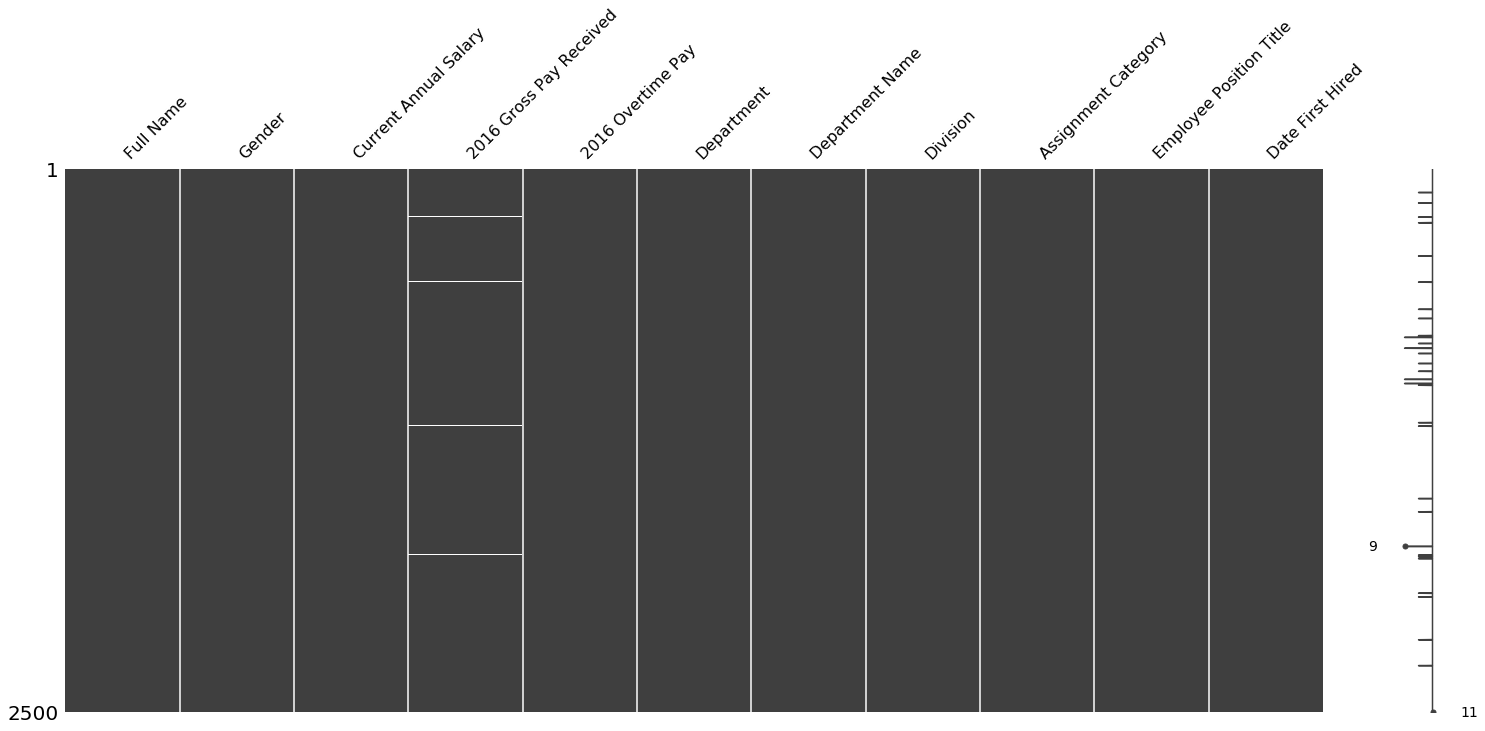

In [35]:
_=msno.matrix(emp_data.sample(2500))

getting the shape of the data

In [36]:
emp_data.shape

(9228, 11)

We can observe that Gender and 2016 Gross pay have few empty values but the reson for them being empty is not known so we leave them empty. we have replaced nan values in over time pay with 0 assuming that the employees with missing values in overtime pay column didnot work over time and since Underfilled job title had more than 75 % of rows empty and we dont use it in our analysis we dropped it. Now the data is clean and we can start analysing it. I have also changed the data type of gender and Assignment category from object to category as they have only two values and it would be more meaning ful if they are represented as category.After cleaning the data has 9228 rows and 11 columns

The number of unique values in Employee Position Title

In [37]:
emp_data['Employee Position Title'].nunique()

385

Employee position title with highest Current Annual Salary
https://stackoverflow.com/questions/10202570/find-row-where-values-for-column-is-maximal-in-a-pandas-dataframe

In [38]:
emp_data.iloc[emp_data['Current Annual Salary'].idxmax()]

Full Name                                     Firestine, Timothy
Gender                                                         M
Current Annual Salary                                     303091
2016 Gross Pay Received                                   313700
2016 Overtime Pay                                              0
Department                                                   CEX
Department Name                  Offices of the County Executive
Division                   Chief Administrative Officer's Office
Assignment Category                             Fulltime-Regular
Employee Position Title             Chief Administrative Officer
Date First Hired                                      11/26/1979
Name: 2665, dtype: object

Employee position title with highest 2016 Overtime Pay

In [39]:
emp_data.iloc[emp_data['2016 Overtime Pay'].idxmax()]

Full Name                                    Watkins, Eric J.
Gender                                                      M
Current Annual Salary                                   94278
2016 Gross Pay Received                                222279
2016 Overtime Pay                                      125244
Department                                                COR
Department Name                 Correction and Rehabilitation
Division                              DS MCCF Unit 1 Security
Assignment Category                          Fulltime-Regular
Employee Position Title    Correctional Supervisor (Sergeant)
Date First Hired                                   07/02/1995
Name: 8741, dtype: object

Plotting the umber of male and female in the data

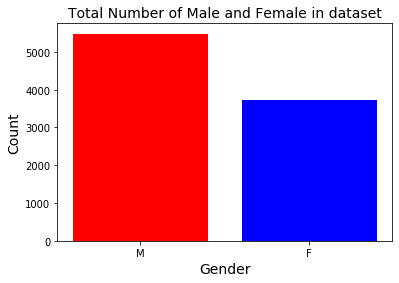

In [40]:
import matplotlib.pyplot as plt
fig1=plt.bar(x=['M','F'],height=emp_data['Gender'].value_counts(),color=['red','blue'])
fig1=plt.ylabel('Count',fontsize=14)
fig1=plt.xlabel('Gender',fontsize=14)
fig1=plt.title('Total Number of Male and Female in dataset',fontsize=14)

Displaying the Number of male and female in each department
Group By:https://www.geeksforgeeks.org/pandas-groupby/

In [41]:
pd.set_option("display.max_rows", 999)
emp_data.groupby(['Department','Gender']).Gender.count()

Department  Gender
BOA         F            3
BOE         F           20
            M            6
CAT         F           52
            M           20
CCL         F           51
            M           38
CEC         F           19
            M           55
CEX         F           23
            M           13
COR         F          179
            M          301
CUS         F           17
            M            9
DEP         F           66
            M           94
DGS         F           66
            M          337
DHS         F            5
            M            7
DLC         F           90
            M          318
DOT         F          226
            M          999
DPS         F           57
            M          164
DTS         F           52
            M           93
ECM         F            2
            M            1
FIN         F           81
            M           34
FRS         F          112
            M         1199
HCA         F           40
         

for displaying the number of full time and parttime employees in each department

In [42]:
emp_data.groupby(['Department','Assignment Category']).count()

Full Name  Gender  Current Annual Salary  \
Department Assignment Category                                             
BOA        Fulltime-Regular           3.0     3.0                    3.0   
           Parttime-Regular           NaN     NaN                    NaN   
BOE        Fulltime-Regular          26.0    26.0                   26.0   
           Parttime-Regular           NaN     NaN                    NaN   
CAT        Fulltime-Regular          70.0    70.0                   70.0   
           Parttime-Regular           2.0     2.0                    2.0   
CCL        Fulltime-Regular          81.0    81.0                   81.0   
           Parttime-Regular           8.0     8.0                    8.0   
CEC        Fulltime-Regular          71.0    71.0                   71.0   
           Parttime-Regular           3.0     3.0                    3.0   
CEX        Fulltime-Regular          32.0    32.0                   32.0   
           Parttime-Regular           4.0     4.0                    4.0   
COR        Fulltime-Regular         482.0   480.0                  482.0   
           Parttime-Regular           NaN     NaN                    NaN   
CUS        Fulltime-Regular          25.0    25.0                   25.0   
           Parttime-Regular           2.0     1.0                    2.0   
DEP        Fulltime-Regular         159.0   159.0                  159.0   
           Parttime-Regular           1.0     1.0                    1.0   
DGS        Fulltime-Regular         404.0   403.0                  404.0   
           Parttime-Regular           NaN     NaN                    NaN   
DHS        Fulltime-Regular          12.0    12.0                   12.0   
           Parttime-Regular           NaN     NaN                    NaN   
DLC        Fulltime-Regular         278.0   278.0                  278.0   
           Parttime-Regular         130.0   130.0                  130.0   
DOT        Fulltime-Regular        1223.0  1222.0                 1223.0   
           Parttime-Regular           3.0     3.0                    3.0   
DPS        Fulltime-Regular         219.0   219.0                  219.0   
           Parttime-Regular           2.0     2.0                    2.0   
DTS        Fulltime-Regular         142.0   142.0                  142.0   
           Parttime-Regular           3.0     3.0                    3.0   
ECM        Fulltime-Regular           3.0     3.0                    3.0   
           Parttime-Regular           NaN     NaN                    NaN   
FIN        Fulltime-Regular         115.0   115.0                  115.0   
           Parttime-Regular           NaN     NaN                    NaN   
FRS        Fulltime-Regular        1310.0  1310.0                 1310.0   
           Parttime-Regular           1.0     1.0                    1.0   
HCA        Fulltime-Regular          71.0    71.0                   71.0   
           Parttime-Regular           3.0     3.0                    3.0   
HHS        Fulltime-Regular        1250.0  1243.0                 1250.0   
           Parttime-Regular         306.0   306.0                  306.0   
HRC        Fulltime-Regular           8.0     8.0                    8.0   
           Parttime-Regular           NaN     NaN                    NaN   
IGR        Fulltime-Regular           4.0     4.0                    4.0   
           Parttime-Regular           1.0     1.0                    1.0   
LIB        Fulltime-Regular         199.0   199.0                  199.0   
           Parttime-Regular         176.0   176.0                  176.0   
MPB        Fulltime-Regular           NaN     NaN                    NaN   
           Parttime-Regular           2.0     2.0                    2.0   
NDA        Fulltime-Regular          14.0    14.0                   14.0   
           Parttime-Regular           NaN     NaN                    NaN   
OAG        Fulltime-Regular          10.0    10.0                   10.0   
    

Plotting a graph for male and female in each department 

In [43]:
labels=list(emp_data.groupby('Department').groups.keys())
female_count=list(emp_data.groupby('Gender').get_group('F').groupby('Department').Department.count())
male_count=list(emp_data.groupby('Gender').get_group('M').groupby('Department').Department.count())
male_count.insert(0,0)

male_count.insert(21,0)

increasing the size of a plot:https://codeyarns.com/2014/10/27/how-to-change-size-of-matplotlib-plot/
grouped bar chart:https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

[6.0, 4.0]


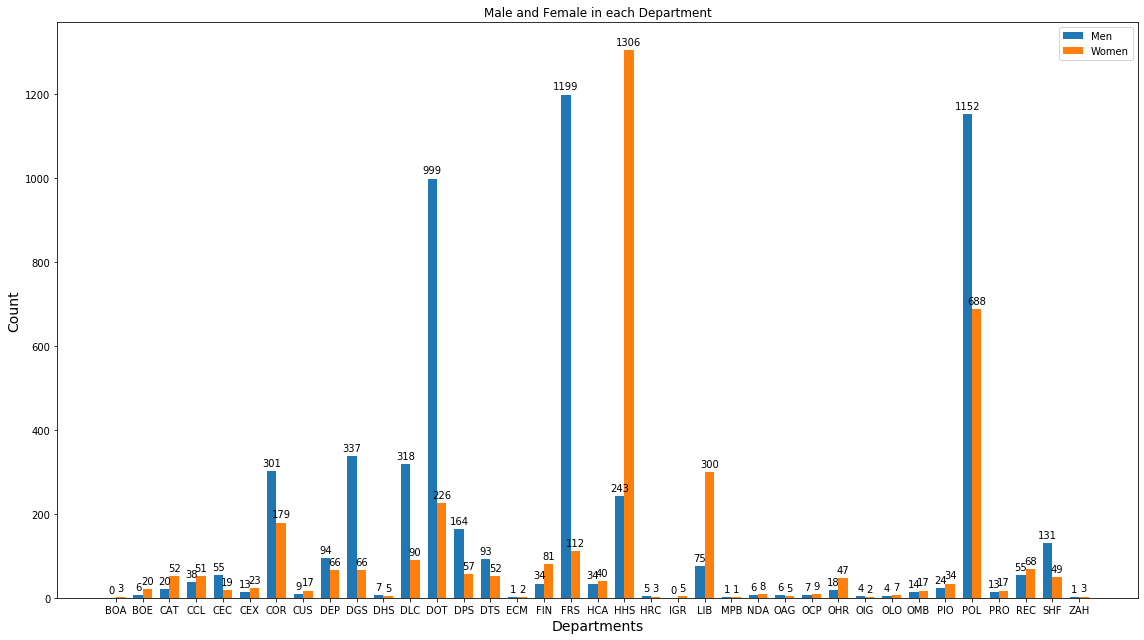

In [44]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label='Men')
rects2 = ax.bar(x + width/2, female_count, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count',fontsize=14)
ax.set_xlabel('Departments',fontsize=14)
ax.set_title('Male and Female in each Department')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


from above graph we can infer that HHS Dept has the highest number female workers FRS dept has highest male workers 

Displaying the number of employees in each department

In [45]:
emp_data['Department Name'].value_counts()

Department of Police                                    1844
Department of Health and Human Services                 1556
Fire and Rescue Services                                1311
Department of Transportation                            1226
Correction and Rehabilitation                            482
Department of Liquor Control                             408
Department of General Services                           404
Department of Public Libraries                           375
Department of Permitting Services                        221
Sheriff's Office                                         180
Department of Environmental Protection                   160
Department of Technology Services                        145
Department of Recreation                                 124
Department of Finance                                    115
County Council                                            89
Department of Housing and Community Affairs               74
Community Engagement Clu

we can observe that department of police has the highest number of employees

In [46]:
emp_data.head()

Full Name Gender  Current Annual Salary  2016 Gross Pay Received  \
0      Aarhus, Pam J.      F               69222.18                 71225.98   
1     Aaron, David J.      M               97392.47                103088.48   
2    Aaron, Marsha M.      F              104717.28                107000.24   
3  Ababio, Godfred A.      M               52734.57                 57819.04   
4      Ababu, Essayas      M               93396.00                 95815.17   

   2016 Overtime Pay Department                              Department Name  \
0             416.10        POL                         Department of Police   
1            3326.19        POL                         Department of Police   
2            1353.32        HHS      Department of Health and Human Services   
3            3423.07        COR                Correction and Rehabilitation   
4               0.00        HCA  Department of Housing and Community Affairs   

                                            Division Assignment Category  \
0  MSB Information Mgmt and Tech Division Records...    Fulltime-Regular   
1         ISB Major Crimes Division Fugitive Section    Fulltime-Regular   
2      Adult Protective and Case Management Services    Fulltime-Regular   
3                         PRRS Facility and Security    Fulltime-Regular   
4                        Affordable Housing Programs    Fulltime-Regular   

       Employee Position Title Date First Hired  
0  Office Services Coordinator       09/22/1986  
1        Master Police Officer       09/12/1988  
2             Social Worker IV       11/19/1989  
3       Resident Supervisor II       05/05/2014  
4      Planning Specialist III       03/05/2007

By observing the data set we can observe that each Department has a Division 
so we can display the divisions in each department

In [47]:
emp_data.groupby(['Department Name','Division']).first()

2016 Gross Pay Received  \
Department Name                                    Division                                                                      
Board of Appeals Department                        Board of Appeals Division                                          47660.62   
                                                   Executive Director                                                136653.89   
Board of Elections                                 Absentee Voting                                                    64808.46   
                                                   Director                                                          154902.37   
                                                   Director's Office                                                 128230.12   
                                                   Election Judge Recruitment                                         98281.47   
                                                   Election Operations                                                95584.76   
                                                   Information Technology                                             91883.68   
                                                   Polling Place Management                                           60081.61   
                                                   Registration Services                                              55865.36   
                                                   Voter Services                                                     86048.62   
Community Engagement Cluster                       Bethesda Urban District                                            87026.78   
                                                   Business Management                                                80002.83   
                                                   Commission for Women                                              136469.23   
                                                   Community Engagement Cluster                                       97158.76   
                                                   Community Partnerships                                            183028.06   
                                                   Gilchrist Center                                                   40686.52   
                                                   Regional Services Centers                                         165986.20   
                                                   Silver Spring Urban District                                       38586.41   
                                                   Wheaton Urban District                                             38888.44   
Community Use of Public Facilities                 Community Use of Public Facilities                                      NaN   
                                                   Director                                                          178112.32   
                                                   Finance and Administrative Support Team                            62859.33   
                                                   Scheduling Team                                                    74280.29   
                                                   Silver Spring Civic Building                                        2038.50   
Correction and Rehabilitation                      DO Director                                                       213210.65   
                                                   DS Detention Services                                              33454.68   
                                                   DS Facility Operations Management                                  59117.69   
                                                   DS Food Services                                                   78207.82   
                                                   DS Gang Intelligence  

we can further observe that each department has divison and each division has different employee position titles so displaying them

In [48]:
emp_data.groupby(['Department Name','Division','Employee Position Title']).first()

2016 Gross Pay Received  \
Department Name                                    Division                                           Employee Position Title                                                       
Board of Appeals Department                        Board of Appeals Division                          Administrative Specialist II                                       71017.30   
                                                                                                      Office Services Coordinator                                        47660.62   
                                                   Executive Director                                 Manager III                                                       136653.89   
Board of Elections                                 Absentee Voting                                    Office Services Coordinator                                        64808.46   
                                                                                                      Program Specialist II                                              84485.38   
                                                   Director                                           Manager I                                                         154902.37   
                                                   Director's Office                                  Management and Budget Specialist III                              112443.37   
                                                                                                      Manager III                                                       128230.12   
                                                   Election Judge Recruitment                         Administrative Specialist I                                        98281.47   
                                                                                                      Administrative Specialist II                                      113678.62   
                                                                                                      Program Specialist II                                             118053.61   
                                                   Election Operations                                Program Manager I                                                  95584.76   
                                                   Information Technology                             Information Technology Specialist III                              86844.33   
                                                                                                      Information Technology Technician III                              91883.68   
                                                                                                      Senior Information Technology Specialist                          116627.03   
                                                   Polling Place Management                           Office Services Coordinator                                        58516.08   
                                                                                                      Principal Administrative Aide                                      61414.92   
                                                                                                      Program Specialist II                                              77527.76   
                                                                                                      Supply Technician II                                               60081.61   
                                                   Registration Services                              Office Services Coordinator                                        55865.36   
                                                                                                      Program Specialist II                                             1121

what are the Different employement position titles available

In [49]:
emp_data['Employee Position Title'].value_counts()

Police Officer III                                          883
Firefighter/Rescuer III                                     694
Bus Operator                                                638
Manager III                                                 243
Correctional Officer III (Corporal)                         228
Master Firefighter/Rescuer                                  218
Office Services Coordinator                                 207
School Health Room Technician I                             204
Community Health Nurse II                                   165
Crossing Guard                                              161
Income Assistance Program Specialist II                     155
Program Manager II                                          145
Fire/Rescue Captain                                         141
Police Sergeant                                             140
Liquor Store Clerk I                                        128
Principal Administrative Aide           

what is the mean,standard deviation,min, max etc of Current annual salary in each Department

In [50]:
emp_data['Current Annual Salary'].groupby(emp_data['Department Name']).describe()

count           mean  \
Department Name                                                             
Board of Appeals Department                            3.0   85723.660000   
Board of Elections                                    26.0   73693.134231   
Community Engagement Cluster                          74.0   63270.334459   
Community Use of Public Facilities                    27.0   75158.538519   
Correction and Rehabilitation                        482.0   73611.839710   
County Attorney's Office                              72.0  105825.370833   
County Council                                        89.0   96242.936517   
Department of Environmental Protection               160.0   88456.027562   
Department of Finance                                115.0   97366.710174   
Department of General Services                       404.0   76044.701757   
Department of Health and Human Services             1556.0   74095.081600   
Department of Housing and Community Affairs           74.0   88664.135541   
Department of Liquor Control                         408.0   49623.288211   
Department of Permitting Services                    221.0   89728.147376   
Department of Police                                1844.0   72004.095477   
Department of Public Libraries                       375.0   52959.067893   
Department of Recreation                             124.0   74834.616371   
Department of Technology Services                    145.0  113849.820000   
Department of Transportation                        1226.0   59213.167896   
Ethics Commission                                      3.0   99365.336667   
Fire and Rescue Services                            1311.0   79315.608444   
Merit System Protection Board Department               2.0   73797.655000   
Non-Departmental Account                              14.0  106372.658571   
Office of Agriculture                                 11.0   73345.135455   
Office of Consumer Protection                         16.0   90609.132500   
Office of Emergency Management and Homeland Sec...    12.0   92673.152500   
Office of Human Resources                             65.0   95468.614308   
Office of Human Rights                                 8.0   97075.716250   
Office of Intergovernmental Relations Department       5.0  132397.948000   
Office of Legislative Oversight                       11.0  110916.574545   
Office of Management and Budget                       31.0  104740.440000   
Office of Procurement                                 30.0   96497.910333   
Office of Public Information                          58.0   70135.136034   
Office of Zoning and Administrative Hearings           4.0  120212.970000   
Office of the Inspector General                        6.0  119265.561667   
Offices of the County Executive                       36.0  117417.756667   
Sheriff's Office                                     180.0   77170.655056   

                                                             std       min  \
Department Name                                                              
Board of Appeals Department                         44538.445270  49336.78   
Board of Elections                                  25456.414714  49759.15   
Community Engagement Cluster                        39189.285070  30860.00   
Community Use of Public Facilities                  30594.616875  23920.00   
Correction and Rehabilitation                       21053.772800  34537.99   
County Attorney's Office                            38261.763576  17269.00   
County Council                                      40511.099509  33534.54   
Department of Environmental Protection              26430.036544  18684.23   
Department of Finance                               32435.605207  40113.21   
Department of General Services                      24739.720363  32000.00   
Department of Health and Human Services             26280.270822  17269.00   
Department of Housing and Community

Office of Intergovernmental Relations Department has the highest avg current annual salary in 2016

Similarly for Gross pay receieved

In [51]:
emp_data['2016 Gross Pay Received'].groupby(emp_data['Department Name']).describe()

count           mean  \
Department Name                                                             
Board of Appeals Department                            3.0   85110.603333   
Board of Elections                                    26.0   88564.259615   
Community Engagement Cluster                          74.0   65174.132297   
Community Use of Public Facilities                    26.0   72466.739615   
Correction and Rehabilitation                        479.0   89112.137015   
County Attorney's Office                              71.0  104940.401690   
County Council                                        89.0   92949.338652   
Department of Environmental Protection               160.0   87103.463750   
Department of Finance                                115.0   96339.153739   
Department of General Services                       403.0   83883.396576   
Department of Health and Human Services             1546.0   71121.950485   
Department of Housing and Community Affairs           74.0   87973.354054   
Department of Liquor Control                         408.0   53653.842525   
Department of Permitting Services                    221.0   89452.481222   
Department of Police                                1835.0   79423.269264   
Department of Public Libraries                       375.0   52305.094560   
Department of Recreation                             121.0   71227.513802   
Department of Technology Services                    145.0  112136.937724   
Department of Transportation                        1224.0   67807.091846   
Ethics Commission                                      3.0   98038.680000   
Fire and Rescue Services                            1243.0  100098.745350   
Merit System Protection Board Department               2.0   58121.400000   
Non-Departmental Account                              13.0  100605.381538   
Office of Agriculture                                 11.0   73106.845455   
Office of Consumer Protection                         16.0   88662.353125   
Office of Emergency Management and Homeland Sec...    12.0   89481.403333   
Office of Human Resources                             64.0   92836.422656   
Office of Human Rights                                 8.0   97552.660000   
Office of Intergovernmental Relations Department       5.0  136684.006000   
Office of Legislative Oversight                       11.0  109389.144545   
Office of Management and Budget                       31.0   99726.616452   
Office of Procurement                                 30.0   95993.203000   
Office of Public Information                          58.0   70555.648621   
Office of Zoning and Administrative Hearings           4.0  118275.227500   
Office of the Inspector General                        6.0  109859.366667   
Offices of the County Executive                       36.0  115194.319167   
Sheriff's Office                                     180.0   80420.034444   

                                                             std       min  \
Department Name                                                              
Board of Appeals Department                         46140.182330  47660.62   
Board of Elections                                  25613.958577  55865.36   
Community Engagement Cluster                        40586.418143   6346.45   
Community Use of Public Facilities                  35733.249624   2038.50   
Correction and Rehabilitation                       31307.471900    511.00   
County Attorney's Office                            41232.726670  16722.04   
County Council                                      42586.401396   6012.55   
Department of Environmental Protection              29607.477781  14423.11   
Department of Finance                               34548.929654  14538.60   
Department of General Services                      28727.403214   1730.80   
Department of Health and Human Services             29802.393529   1657.70   
Department of Housing and Community

Office of Intergovernmental Relations Department has the highest avg Gross Pay in 2016

Similarly for Overtime Pay

In [52]:
emp_data['2016 Overtime Pay'].groupby(emp_data['Department Name']).describe()

count          mean  \
Department Name                                                            
Board of Appeals Department                            3.0      0.000000   
Board of Elections                                    26.0  16048.780385   
Community Engagement Cluster                          74.0   3491.512973   
Community Use of Public Facilities                    27.0   1340.578519   
Correction and Rehabilitation                        482.0  16584.854253   
County Attorney's Office                              72.0    220.249861   
County Council                                        89.0     42.361910   
Department of Environmental Protection               160.0   1836.128812   
Department of Finance                                115.0   1037.565652   
Department of General Services                       404.0   7800.443614   
Department of Health and Human Services             1556.0    662.214614   
Department of Housing and Community Affairs           74.0    379.187838   
Department of Liquor Control                         408.0   4166.749559   
Department of Permitting Services                    221.0   2505.134842   
Department of Police                                1844.0   7372.433606   
Department of Public Libraries                       375.0     12.746693   
Department of Recreation                             124.0    535.994032   
Department of Technology Services                    145.0   1665.803241   
Department of Transportation                        1226.0  10421.529984   
Ethics Commission                                      3.0      0.000000   
Fire and Rescue Services                            1311.0  16731.205362   
Merit System Protection Board Department               2.0      0.000000   
Non-Departmental Account                              14.0    476.460714   
Office of Agriculture                                 11.0      0.000000   
Office of Consumer Protection                         16.0      0.000000   
Office of Emergency Management and Homeland Sec...    12.0   2562.401667   
Office of Human Resources                             65.0    515.383538   
Office of Human Rights                                 8.0   1214.990000   
Office of Intergovernmental Relations Department       5.0    578.916000   
Office of Legislative Oversight                       11.0      0.000000   
Office of Management and Budget                       31.0    126.504516   
Office of Procurement                                 30.0    212.539667   
Office of Public Information                          58.0   2382.563276   
Office of Zoning and Administrative Hearings           4.0      0.000000   
Office of the Inspector General                        6.0    101.940000   
Offices of the County Executive                       36.0      8.560833   
Sheriff's Office                                     180.0   4279.700278   

                                                             std  min  \
Department Name                                                         
Board of Appeals Department                             0.000000  0.0   
Board of Elections                                  10490.440202  0.0   
Community Engagement Cluster                         3722.508753  0.0   
Community Use of Public Facilities                   2356.613787  0.0   
Correction and Rehabilitation                       18050.609919  0.0   
County Attorney's Office                              702.139251  0.0   
County Council                                        203.974868  0.0   
Department of Environmental Protection               4578.917689  0.0   
Department of Finance                                2732.051478  0.0   
Department of General Services                       9697.238750  0.0   
Department of Health and Human Services              2760.827567  0.0   
Department of Housing and Community Affairs          1290.088163  0.0   
Department of Liquor Control                         4617.237663  

Fire and Rescue services has the highest avg 2016 overtime pay

Displaying the mean of Current Annual Salary , Gross Pay and Overtime Pay for each Division
operations on group by:https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_groups/


In [53]:
emp_data.groupby(['Department Name','Division']).mean()

Current Annual Salary  \
Department Name                                    Division                                                                    
Board of Appeals Department                        Board of Appeals Division                                    60889.490000   
                                                   Executive Director                                          135392.000000   
Board of Elections                                 Absentee Voting                                              60372.746667   
                                                   Director                                                    157996.400000   
                                                   Director's Office                                           117611.790000   
                                                   Election Judge Recruitment                                   77516.927500   
                                                   Election Operations                                          79762.340000   
                                                   Information Technology                                       77511.456667   
                                                   Polling Place Management                                     59884.251667   
                                                   Registration Services                                        56746.968000   
                                                   Voter Services                                               76278.500000   
Community Engagement Cluster                       Bethesda Urban District                                      86673.480000   
                                                   Business Management                                          81824.510000   
                                                   Commission for Women                                        138593.520000   
                                                   Community Engagement Cluster                                 86308.080000   
                                                   Community Partnerships                                      110485.061667   
                                                   Gilchrist Center                                             49155.660000   
                                                   Regional Services Centers                                   163377.868000   
                                                   Silver Spring Urban District                                 44254.663714   
                                                   Wheaton Urban District                                       49463.635789   
Community Use of Public Facilities                 Community Use of Public Facilities                           23920.000000   
                                                   Director                                                    175110.540000   
                                                   Finance and Administrative Support Team                      85152.014286   
                                                   Scheduling Team                                              67544.622667   
                                                   Silver Spring Civic Building                                 73672.186667   
Correction and Rehabilitation                      DO Director                                                 120433.666667   
                                                   DS Detention Services                                        94705.255000   
                                                   DS Facility Operations Management                            58448.000000   
                                                   DS Food Services                                             61187.621500   
                                                   DS Gang Intelligence                                         82289.480000   
       

Displaying the mean of Current Annual Salary , Gross Pay and Overtime Pay for each Employee Position Title

In [54]:
emp_data.groupby(['Department Name','Division','Employee Position Title']).mean()

Current Annual Salary  \
Department Name                                    Division                                           Employee Position Title                                                     
Board of Appeals Department                        Board of Appeals Division                          Administrative Specialist II                                 72442.200000   
                                                                                                      Office Services Coordinator                                  49336.780000   
                                                   Executive Director                                 Manager III                                                 135392.000000   
Board of Elections                                 Absentee Voting                                    Office Services Coordinator                                  56272.070000   
                                                                                                      Program Specialist II                                        68574.100000   
                                                   Director                                           Manager I                                                   157996.400000   
                                                   Director's Office                                  Management and Budget Specialist III                        104717.280000   
                                                                                                      Manager III                                                 130506.300000   
                                                   Election Judge Recruitment                         Administrative Specialist I                                  71634.595000   
                                                                                                      Administrative Specialist II                                 84974.000000   
                                                                                                      Program Specialist II                                        81824.520000   
                                                   Election Operations                                Program Manager I                                            79762.340000   
                                                   Information Technology                             Information Technology Specialist III                        72628.780000   
                                                                                                      Information Technology Technician III                        62359.070000   
                                                                                                      Senior Information Technology Specialist                     97546.520000   
                                                   Polling Place Management                           Office Services Coordinator                                  56650.750000   
                                                                                                      Principal Administrative Aide                                56462.680000   
                                                                                                      Program Specialist II                                        66032.635000   
                                                                                                      Supply Technician II                                         57476.060000   
                                                   Registration Services                              Office Services Coordinator                                  51642.345000   
                                                                                                      Program Specialist II                                        77165.460000   
                                     

A histogram Representation of Current annual salary, Gross Pay and Overtime Pay

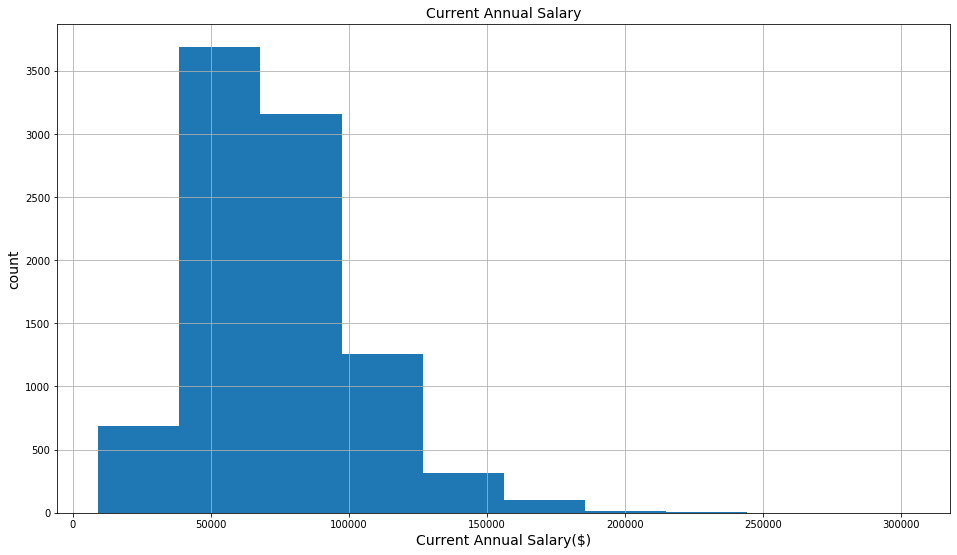

In [55]:
_=emp_data['Current Annual Salary'].hist()
_=plt.ylabel('count',fontsize=14)
_=plt.xlabel('Current Annual Salary($)',fontsize=14)
_=plt.title('Current Annual Salary',fontsize=14)


we can observe that most of the people had current annual salaries ranging from 0-10000$

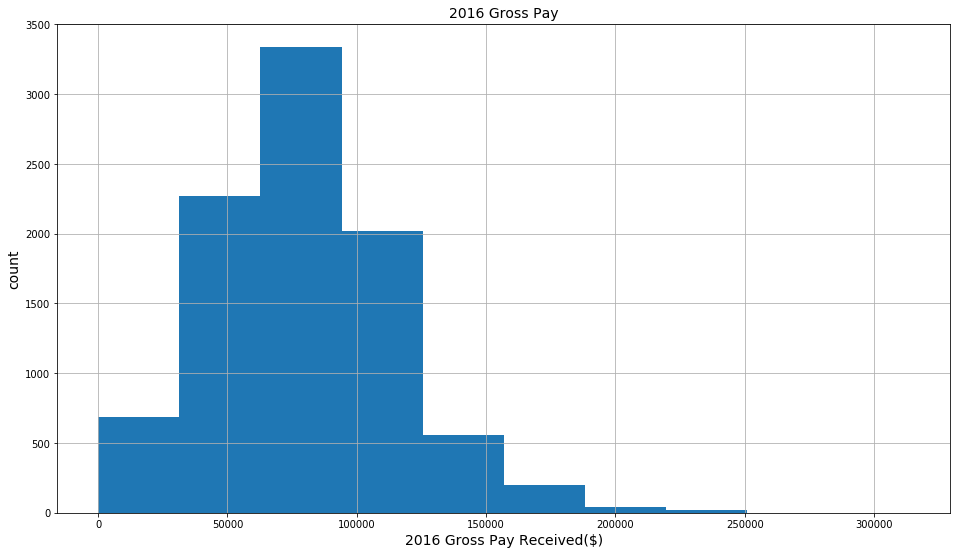

In [56]:
_=emp_data['2016 Gross Pay Received'].hist()
_=plt.ylabel('count',fontsize=14)
_=plt.xlabel('2016 Gross Pay Received($)',fontsize=14)
_=plt.title('2016 Gross Pay',fontsize=14)

we can observe that most of the people had gross pay  ranging from 5000-10000$

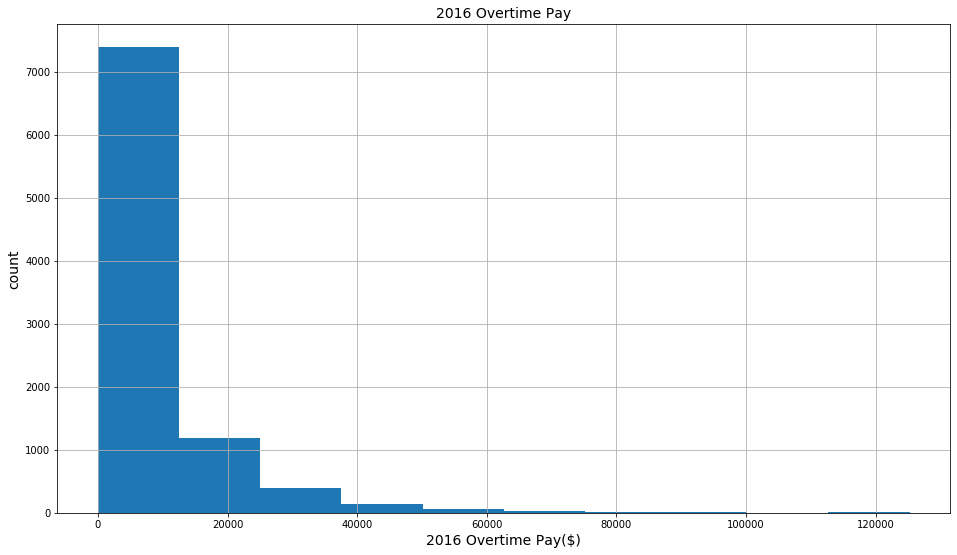

In [57]:
_=emp_data['2016 Overtime Pay'].hist()
_=plt.ylabel('count',fontsize=14)
_=plt.xlabel('2016 Overtime Pay($)',fontsize=14)
_=plt.title('2016 Overtime Pay',fontsize=14)

we can observe that most of the people had overtime pay  ranging from 0-2000$

Displaying the mean of Current Annual Salary for each department

Text(0.5, 1.0, 'Mean of Current Annual Salary of each Department')

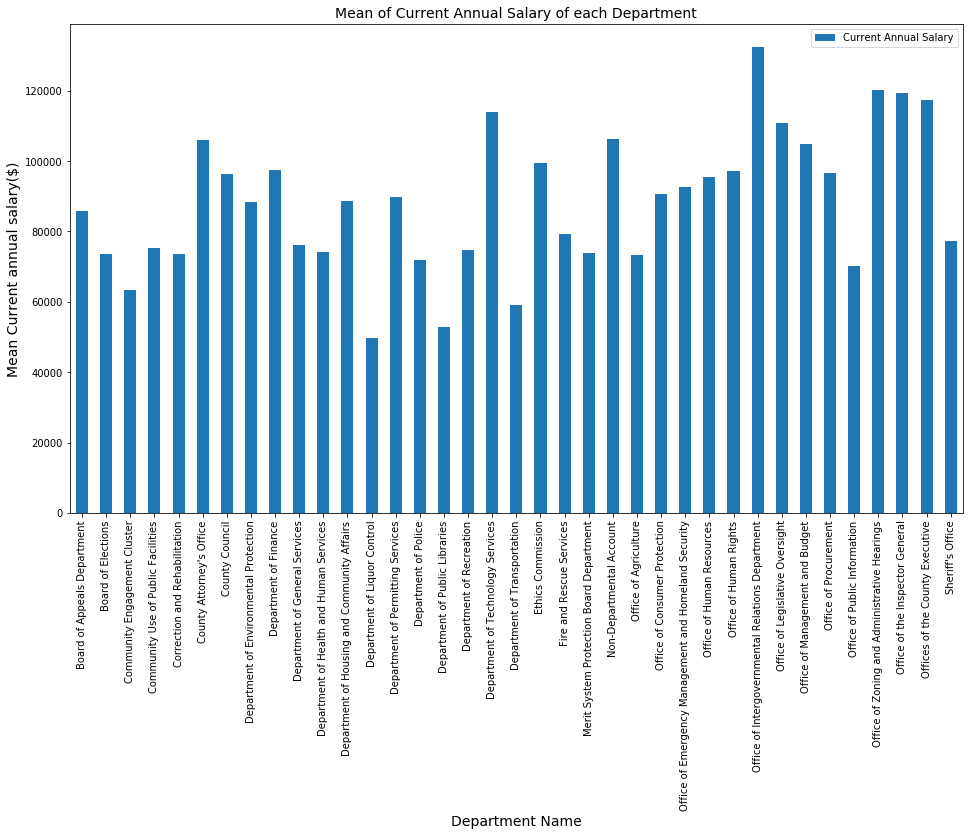

In [58]:
fig4=pd.DataFrame(emp_data['Current Annual Salary'].groupby(emp_data['Department Name']).mean()).plot.bar()
fig4.set_xlabel('Department Name',fontsize=14)
fig4.set_ylabel('Mean Current annual salary($)',fontsize=14)
fig4.set_title('Mean of Current Annual Salary of each Department',fontsize=14)

Office of Intergovernmental Relations Department has the highest avg current annual salary in 2016

Displaying the mean of 2016 Gross Pay  for each department

Text(0.5, 1.0, 'Mean of 2016 Gross Pay Receieved of each Department')

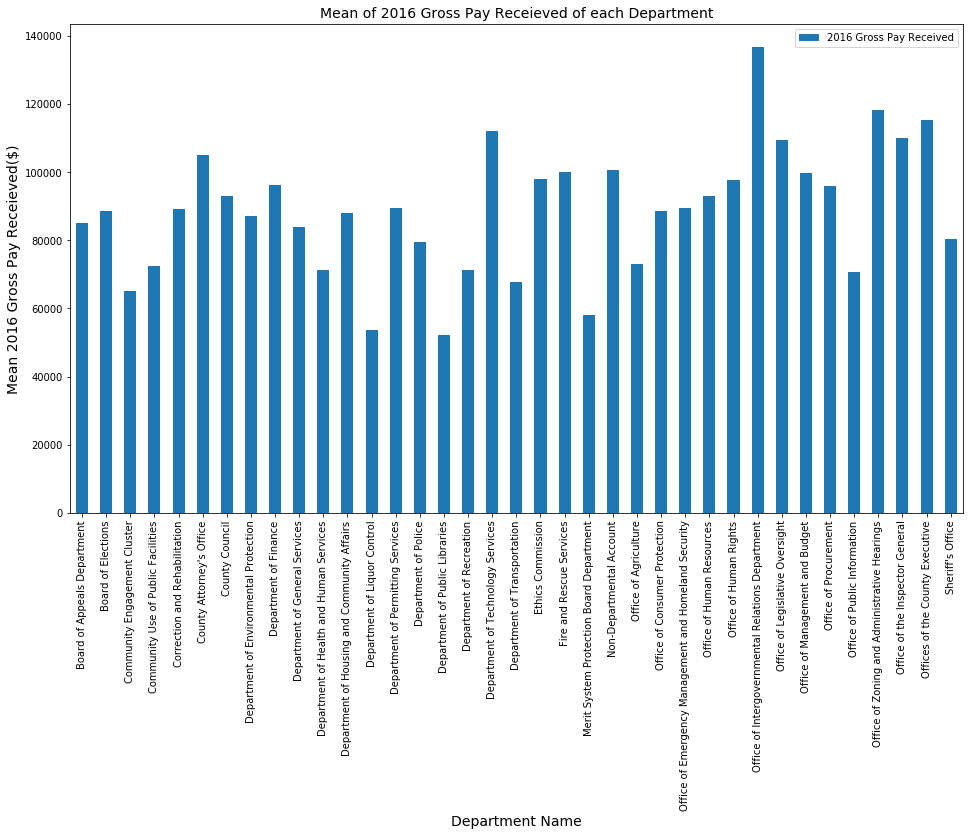

In [59]:
fig5=pd.DataFrame(emp_data['2016 Gross Pay Received'].groupby(emp_data['Department Name']).mean()).plot.bar()
fig5.set_xlabel('Department Name',fontsize=14)
fig5.set_ylabel('Mean 2016 Gross Pay Receieved($)',fontsize=14)
fig5.set_title('Mean of 2016 Gross Pay Receieved of each Department',fontsize=14)

Office of Intergovernmental Relations Department has the highest avg Gross Pay in 2016

Displaying the mean of  2016 Overtime Pay for each department

Text(0.5, 1.0, 'Mean of 2016 Overtime Pay of each Department')

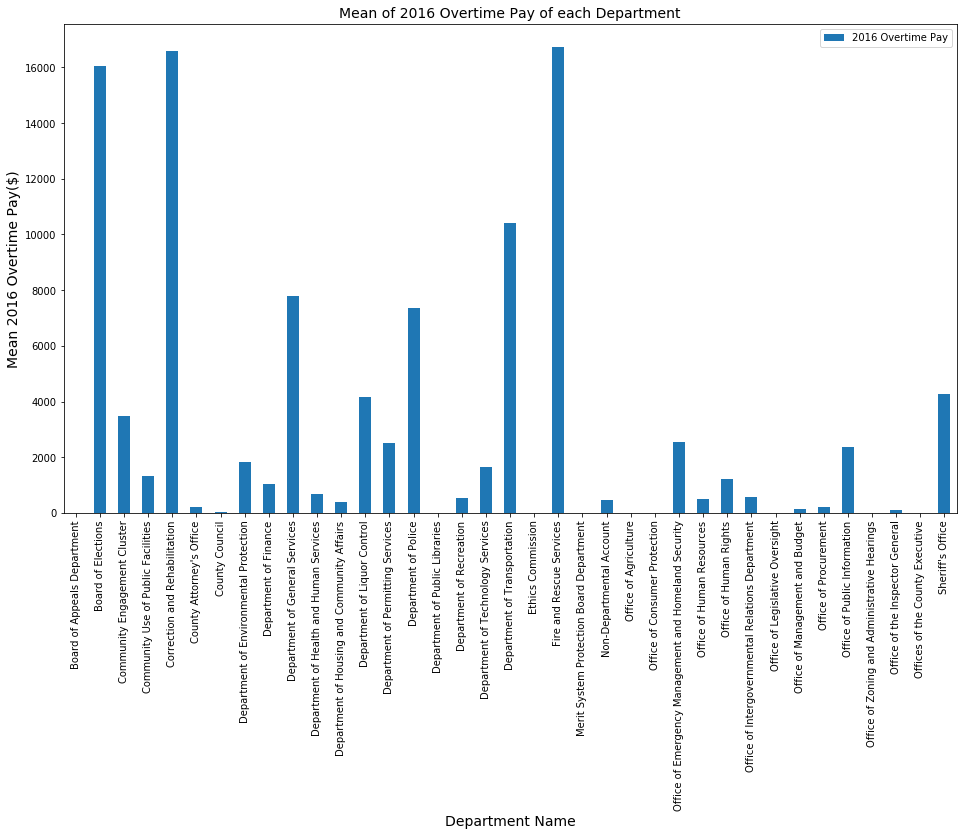

In [60]:
fig6=pd.DataFrame(emp_data['2016 Overtime Pay'].groupby(emp_data['Department Name']).mean()).plot.bar()

fig6.set_xlabel('Department Name',fontsize=14)
fig6.set_ylabel('Mean 2016 Overtime Pay($)',fontsize=14)
fig6.set_title('Mean of 2016 Overtime Pay of each Department',fontsize=14)

Fire and Rescue services has the highest avg 2016 overtime pay

In [61]:
print(time.time() - start_time,'seconds')

22.524885177612305 seconds


# What have I learnt
 We cannot always understand the inconsistencies in data just by looking at the data. We have to follow a sequence of steps to understand the inconsistencies and then clean data. we cannot just deal the missing values by filling them with mean values or dropping them, we have to understand why the data was missing and then fill the  missing values if they need to be filled or leave them unfilled  or drop them if they are not useful for our analysis. I learnt how to plot a split bar chart and how to group data. I have learnt how to increase the size of a plot and how to label axes of a plot.
